# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mana
Processing Record 2 of Set 1 | barrouallie
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | mahina
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | minas de marcona
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | kuanda
Processing 

In [4]:
# check data
city_weather

{'coord': {'lon': -55.1667, 'lat': 4.75},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 77.97,
  'feels_like': 79.09,
  'temp_min': 77.97,
  'temp_max': 77.97,
  'pressure': 1014,
  'humidity': 77,
  'sea_level': 1014,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 11.74, 'deg': 50, 'gust': 24.16},
 'clouds': {'all': 11},
 'dt': 1707706577,
 'sys': {'country': 'SR', 'sunrise': 1707645381, 'sunset': 1707688417},
 'timezone': -10800,
 'id': 3384481,
 'name': 'Distrikt Brokopondo',
 'cod': 200}

In [5]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mana,5.6592,-53.7767,78.31,82,33,10.83,GF,1707706487
1,barrouallie,13.2333,-61.2667,76.78,74,3,10.40,VC,1707706487
2,blackmans bay,-43.0167,147.3167,74.52,62,55,3.00,AU,1707706487
3,stanley,54.8680,-1.6985,37.27,93,20,6.91,GB,1707706487
4,mahina,-17.5065,-149.4890,80.37,89,75,13.80,PF,1707706487


In [11]:
# Convert the cities weather data into a Pandas DataFrame
# create dataframe and export relevant data

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#convert dataframe to csv (pandas)
city_data_df.to_csv("starter_code", index_label="City_ID")

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mana,5.6592,-53.7767,78.31,82,33,10.83,GF,1707706487
1,barrouallie,13.2333,-61.2667,76.78,74,3,10.40,VC,1707706487
2,blackmans bay,-43.0167,147.3167,74.52,62,55,3.00,AU,1707706487
3,stanley,54.8680,-1.6985,37.27,93,20,6.91,GB,1707706487
4,mahina,-17.5065,-149.4890,80.37,89,75,13.80,PF,1707706487


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mana,5.6592,-53.7767,78.31,82,33,10.83,GF,1707706487
1,barrouallie,13.2333,-61.2667,76.78,74,3,10.40,VC,1707706487
2,blackmans bay,-43.0167,147.3167,74.52,62,55,3.00,AU,1707706487
3,stanley,54.8680,-1.6985,37.27,93,20,6.91,GB,1707706487
4,mahina,-17.5065,-149.4890,80.37,89,75,13.80,PF,1707706487


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

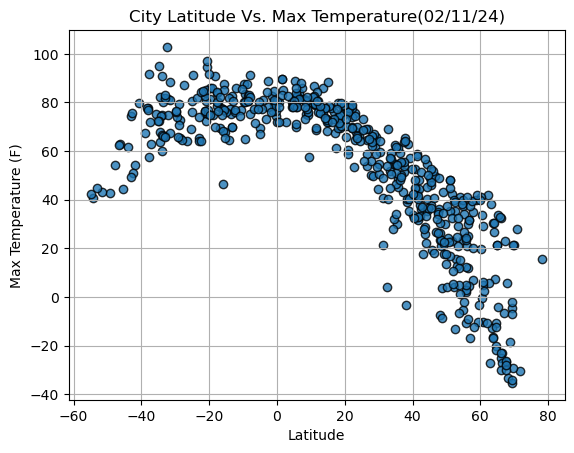

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

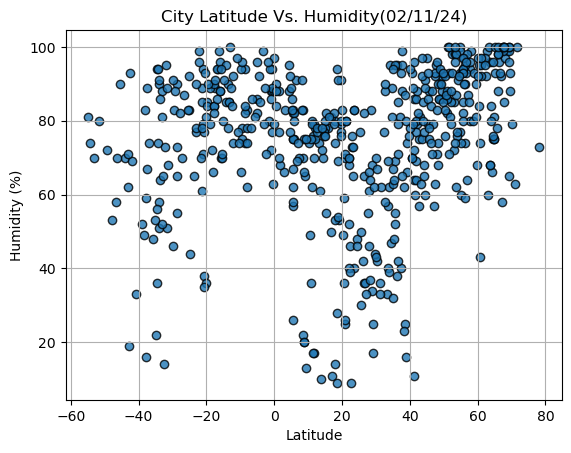

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

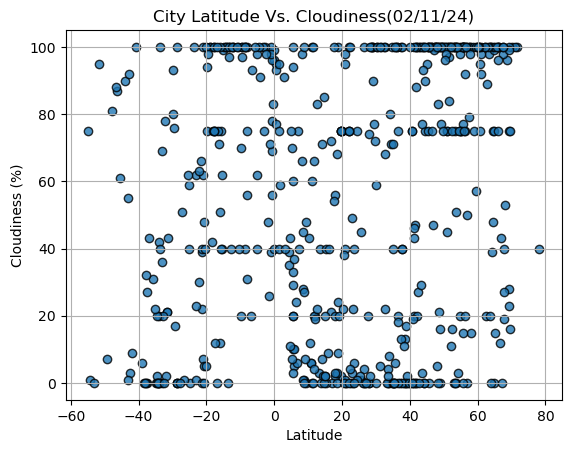

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

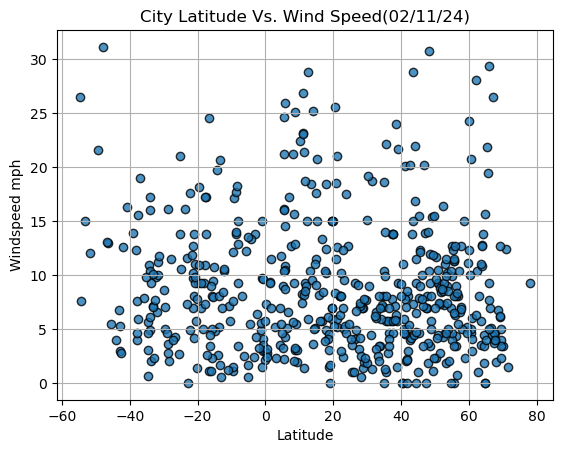

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mana,5.6592,-53.7767,78.31,82,33,10.83,GF,1707706487
1,barrouallie,13.2333,-61.2667,76.78,74,3,10.40,VC,1707706487
3,stanley,54.8680,-1.6985,37.27,93,20,6.91,GB,1707706487
5,aasiaat,68.7098,-52.8699,-18.36,99,96,6.80,GL,1707706487
7,colonia,50.9333,6.9500,48.06,86,75,9.22,DE,1707706202


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,74.52,62,55,3.00,AU,1707706487
4,mahina,-17.5065,-149.4890,80.37,89,75,13.80,PF,1707706487
6,port-aux-francais,-49.3500,70.2167,42.89,72,7,21.63,TF,1707706487
9,minas de marcona,-15.2119,-75.1103,67.75,80,99,10.78,PE,1707706488
11,adamstown,-25.0660,-130.1015,76.06,92,59,21.07,PN,1707706488


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8826307149668692


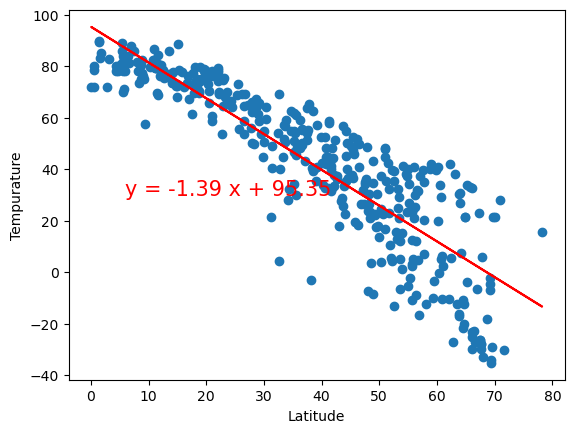

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Tempurature")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.4903999860720287


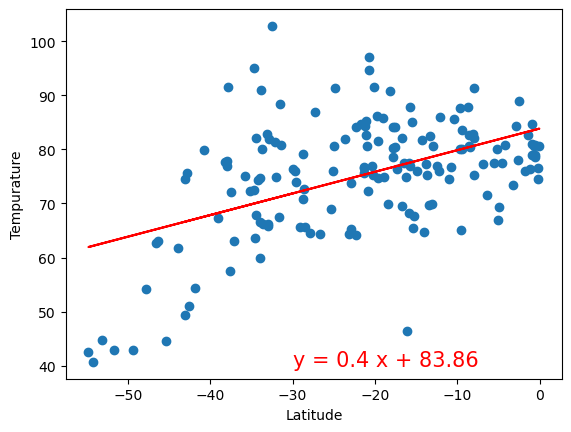

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Tempurature")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** When comparing the linear relationship between the maximum temperatures in the North and the Southern hemispheres there is a distinct pattern that emerges. The Northern hemisphere has a downward trend, showing that when you move north away from the equator the temperature decreases. With the r-value of -0.88 which further shows the negative correlation, and y=-1.39+95.35 which shows the downward slope, meaning the temperature is dropping as you get further from the equator. This is the exact opposite in the Southern hemisphere, when moving south away from the equator, the temperature drops, which is seen with the r-value at 0.49 and the y=0.4+83.86. Therefore, we can notice in both the northern and southern hemisphere as you move away from the equator the temperature decreases and the closer you are the equator the warmer the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4099978041802581


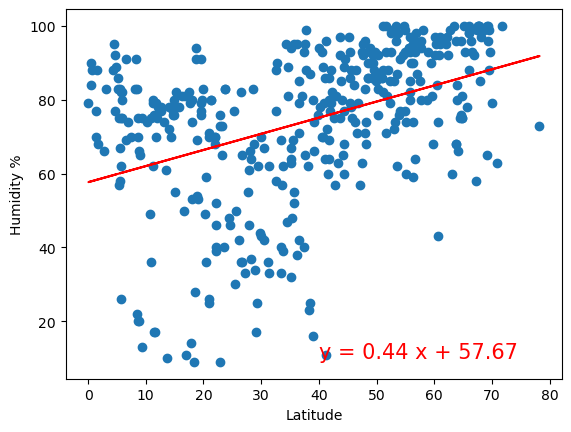

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity %")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.4045664517583906


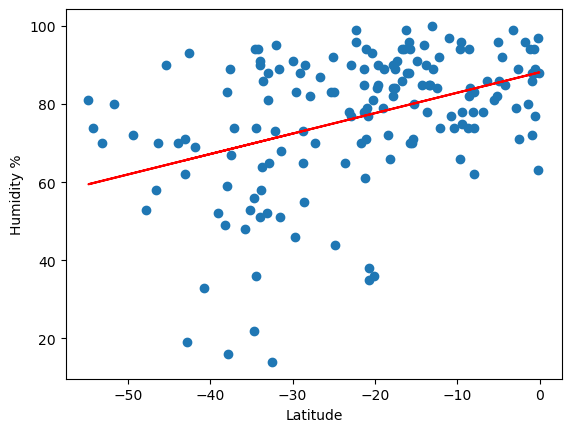

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity %")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** There is no significate trend between latitude and humidity. In the Northern hemisphere there is more humidity farther away from the equator, while in the Southern hemisphere there is more humidity closer to the equator. Both scatter plots have similar r-values and slope lines with an upward trend towards the left.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3378613520572508


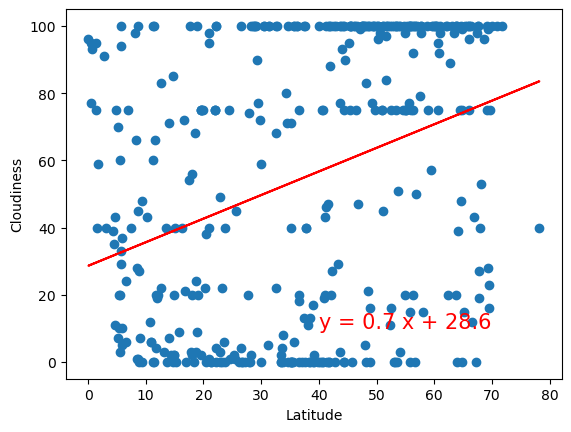

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.425289009006735


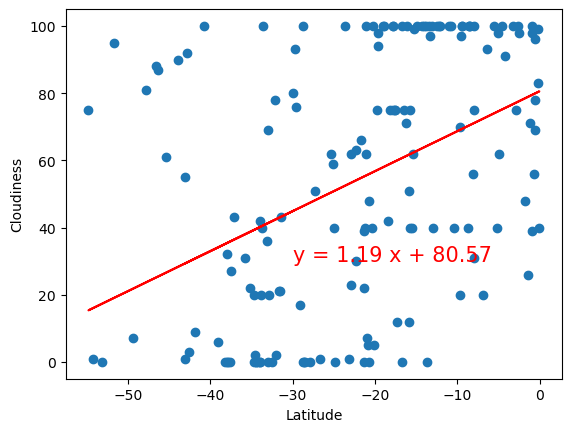

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** There is no significate trend between latitude and cloudiness. Similarly to the humidity, the Northern hemisphere has more clouds farther away from the equator, while the Southern hemisphere has more cloud coverage closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.11592344759346786


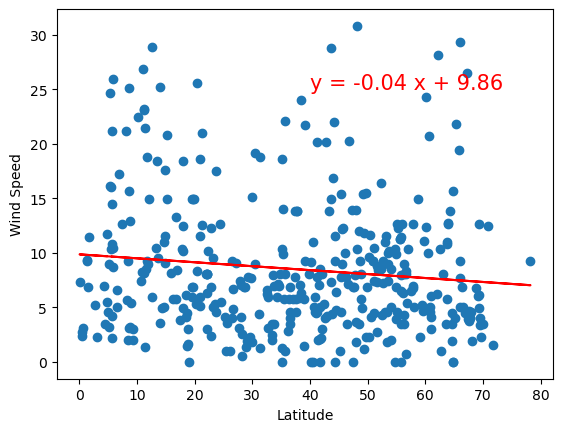

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.20765830519623102


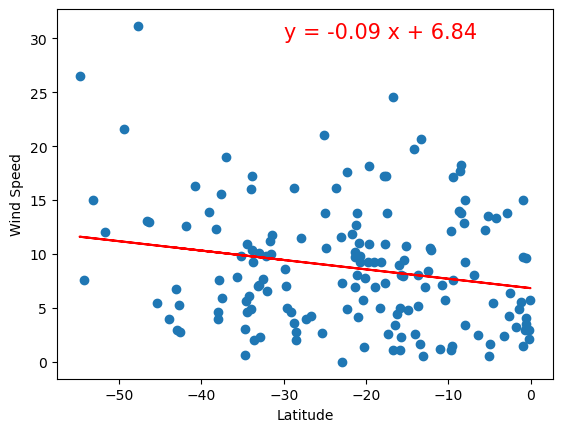

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** There is no significate trend between latitude and wind speed. Similarly to the humidity and cloudiness, the Northern hemisphere has higher wind speeds farther away from the equator, while the Southern hemisphere has higher wind speeds closer to the equator.